# **1. PROBLEM DEFINITION**
## a. Defining the Question

Predict whether a loan application will be approved or not based on borrower-related features and loan characteristics.

## b. Defining the Metric for Success

Our model will be considered successful if it achieves at least 80% accuracy in predicting the loan_status (1 = Approved, 0 = Not Approved).

## c. Understanding the Context
In the financial sector, making efficient and fair loan approval decisions is vital. Traditional manual methods of evaluating loan applications are often slow, inconsistent, and susceptible to human bias. With the increase in application volumes, it's necessary to adopt automated solutions.
Machine learning offers a scalable, data-driven approach to support or even automate these decisions—reducing risks and increasing transparency.

Source of the dataset: Kaggle

Link to the dataset: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

## d. Data Relevance
This model could be of significant use to lending institutions such as banks, microfinance organizations, and fintech startups. It helps in reducing approval times, minimizing bias, improving credit access, and making consistent data-driven decisions that support inclusive lending practices.

## e. Recording the Experimental Design

a) Business Understanding

b) Data Understanding

c) Data Cleaning

d) Exploratory Data Analysis (EDA)

e) Modeling

f) Evaluation




# **2. DATA UNDERSTANDING**

# I. Reading the dataset

In [ ]:
#importing the data analysis and data manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#import the loan dataset
#Imported locally as it's noted to be faster than imported from direct URL.
loan_df =pd.read_csv('/content/loan_data.csv')
#then preview the dataset
print('The top 5 rows of the dataset are: \n', loan_df.head())

The top 5 rows of the dataset are: 
    person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49       

In [ ]:
#preview the last 5 rows of the dataset
print('The last 5 rows of the dataset are: \n', loan_df.tail())

The last 5 rows of the dataset are: 
        person_age person_gender person_education  person_income  \
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
44995               6                  RENT    15000.0            MEDICAL   
44996              17                  RENT     9000.0    HOMEIMPROVEMENT   
44997               7                  RENT     2771.0  DEBTCONSOLIDATION   
44998               4                  RENT    12000.0          EDUCATION   
44999               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
44995          15.66   

# II. Checking the Data

In [ ]:
# Let's preview the shape of our dataset
print('The loan dataset has '+str(loan_df.shape))

The loan dataset has (45000, 14)


The dataset has 14 columns and 45,000 rows

In [ ]:
#check info to understand data types and description of the dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

* Our dataset has 9 numerical features; 6 of float data type and 3 integers.
* It has 5 categorical features
* There are no missing values as there are 45,000 non-null values. However, we shall still do data cleaning to check for duplicates or anomalies
*The dataset has has a memory size of approximately 4.8MB meaning it is moderately sized to train complex models without any computation expenses


# **3. DATA PREPROCESSING**

## I. Data Cleaning

In [ ]:
#first, the person age column is of float data type, convert it to integer
loan_df['person_age'] = loan_df['person_age'].astype(int)

### Checking for Missing Values

In [ ]:
#let us check for missing values to be sure
loan_df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


There are no missing values

### Checking for Anomalies

In [ ]:
# we check for duplicates in the dataset
print(loan_df.duplicated().any())

# If any, print the sum of duplicates
print(loan_df.duplicated().sum())


False
0


There are no duplicate values

In [ ]:
#check for unique values
loan_df.nunique()

,0
person_age,60
person_gender,2
person_education,5
person_income,33989
person_emp_exp,63
person_home_ownership,4
loan_amnt,4483
loan_intent,6
loan_int_rate,1302
loan_percent_income,64




* There are 56 unique ages represented in our dataset.
* There are 2 unique genders grouped as 'Male' and 'Female'.
* There are 5 unique education levels, similar to the example I mentioned earlier.
* There are a surprisingly high number (33,989) of unique income values, suggesting a wide range of incomes.
* There are 63 unique values for employment experience (in years).
* There are 4 unique categories for home ownership grouped as 'Rent', 'Own', 'Mortgage','other'
* There are 4,483 unique loan amounts requested.
* There are 6 unique reasons or purposes for taking the loan.
* There are 1,302 unique interest rates offered.
* There are 64 unique values for the ratio of loan amount to income.
* There are 29 unique values for credit history length.
* There are 340 unique credit scores.
* There are 2 unique values, indicating whether a person had previous loan defaults where 0 is for No and 1 for Yes.
* There are 2 unique values, representing loan approval status; 0 for Not Approved and 1 for Approved.
### Key Observations
* High Cardinality: person_income has very high cardinality. This might need to be addressed during feature engineering (binning or transformation).
* Categorical Features: Columns like person_gender, person_education, person_home_ownership, and loan_intent clearly represent categorical data, which should be handled accordingly during model building.
* Target Variable: loan_status has 2 unique values, confirming it's a binary classification problem (Approved or Not Approved).

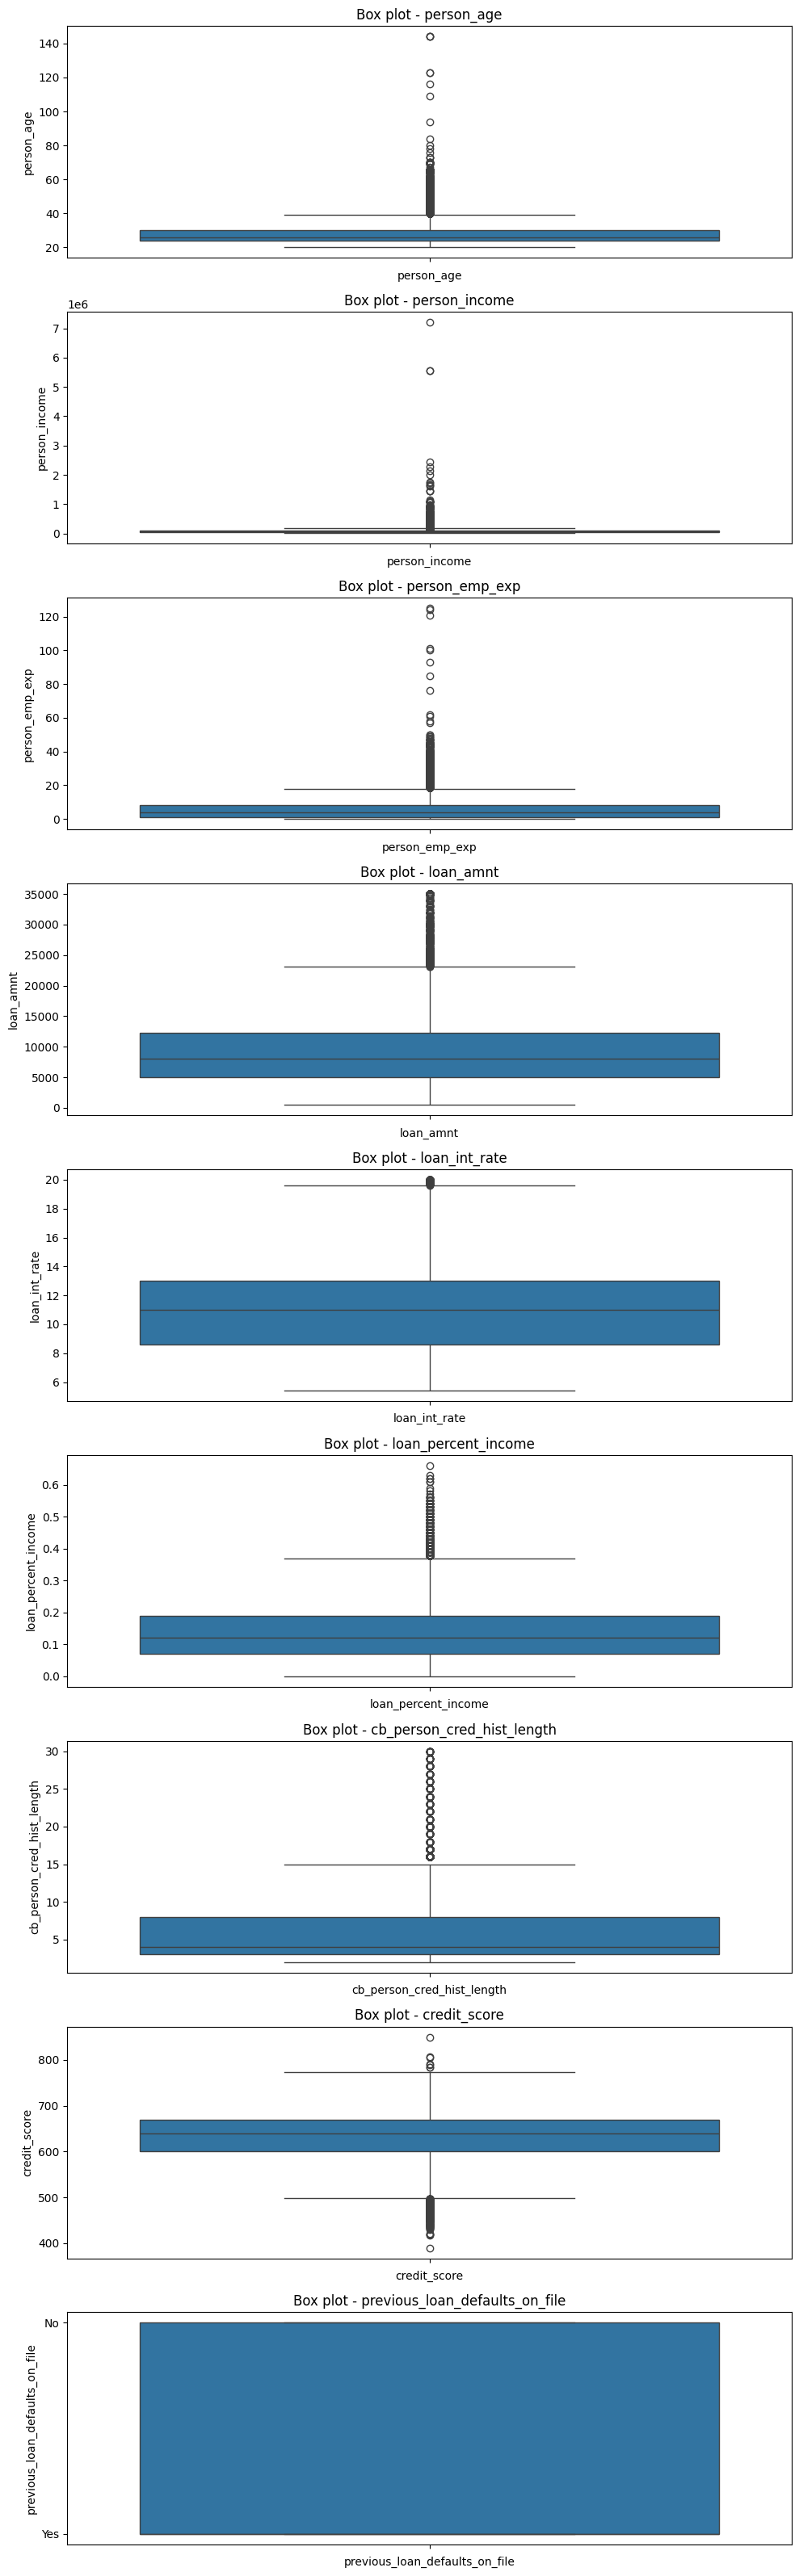

In [ ]:
#Checking for Outliers
# Define col_names with the columns you want to plot
col_names = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
             'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
             'credit_score', 'previous_loan_defaults_on_file']

fig, ax = plt.subplots(len(col_names), figsize=(10,32))
for i, col_val in enumerate(col_names):
    sns.boxplot(y=loan_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
#handling outliers like in the person age column (over 100 years) by filtering out
loan_df = loan_df[loan_df['person_age'] < 100]


# **4. EXPLORATORY DATA ANALYSIS**

In [ ]:
# Running a descriptive statistics of the dataset to check the numerical features
loan_df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44993.000000,4.499300e+04,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000
mean,27.748428,7.990845e+04,5.394528,9583.176761,11.006448,0.139736,5.866557,632.585713,0.222257
std,5.909737,6.332213e+04,5.927159,6314.802655,2.978985,0.087207,3.877167,50.402411,0.415767
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.719500e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.577800e+04,8.000000,12237.000000,12.990000,0.190000,8.000000,670.000000,0.000000
max,94.000000,2.448661e+06,76.000000,35000.000000,20.000000,0.660000,30.000000,784.000000,1.000000


* The average income is around 79,908, but there is significant variability, as indicated by the standard deviation.
* The average age is around 27.75 years, with a standard deviation of around 6. This indicates a relatively young borrower base with moderate age variation.
* The average employment experience is approximately 5.39 years, with a standard deviation of approximately 6. This indicates a mix of experience levels, with some applicants having substantially longer work histories than others.
* The average loan amount is 9,583.
* Interest rates range from 5.42% to 20%.
* Credit scores range from 390 to 850.
* The loan approval rate is about 22.22%, meaning that about 22.22% of the loan applications in the dataset were approved.

By comparing the min and max values with the 25%, 50%, and 75% percentiles, we can identify potential outliers. For example, the maximum person_age of 94 is likely an error or an outlier. Similarly, the maximum person_income of over 7 million is significantly higher than the 75th percentile, suggesting a potential outlier. This suggests need for further analysis

loan_status
0    34993
1    10000
Name: count, dtype: int64


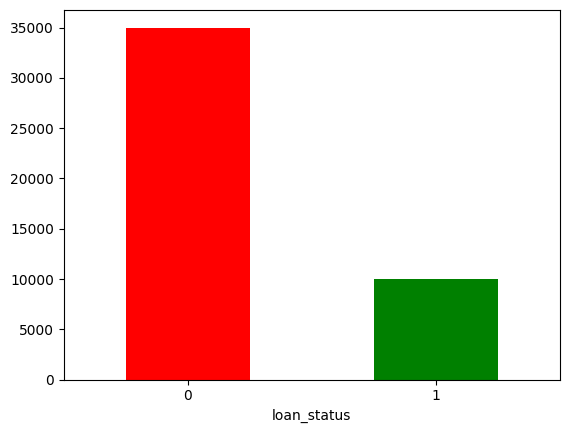

In [ ]:
#visualize loan status distribution; how many are approved and how many are not
loan_df.loan_status.value_counts().plot(kind = 'bar', rot = 0, color = ['red', 'green'])
print(loan_df.loan_status.value_counts())

The results reveal that 34,993 loan applications were not approved and 10,000 were appoved

person_gender
male      24836
female    20157
Name: count, dtype: int64


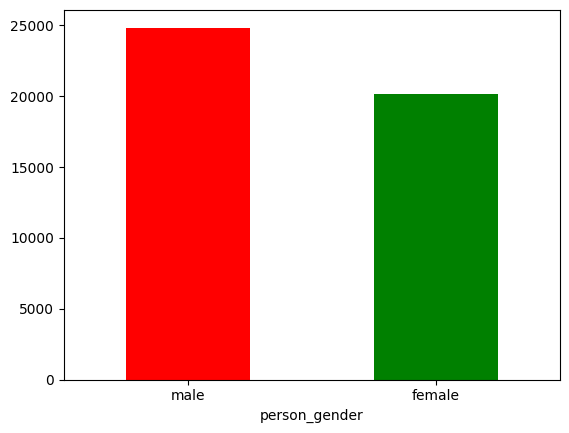

In [ ]:
#gender distribution
loan_df.person_gender.value_counts().plot(kind = 'bar', rot = 0, color = ['red', 'green'])
print(loan_df.person_gender.value_counts())

Output reveals that 24,836 of loan applicants were male compared to 20,157 females

person_education
Bachelor       13396
Associate      12026
High School    11970
Master          6980
Doctorate        621
Name: count, dtype: int64


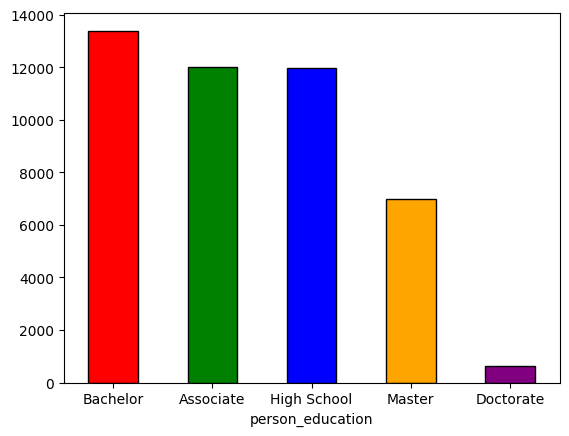

In [ ]:
#education distribution
loan_df.person_education.value_counts().plot(kind = 'bar', rot = 0, color=['red', 'green', 'blue', 'orange', 'purple'], edgecolor='black')
print(loan_df.person_education.value_counts())


* The most common education level among loan applicants is a Bachelor's degree, followed closely by Associate's and High School diplomas.
* A Doctorate is the least common education level among applicants.
* The distribution suggests that a large portion of the loan applicants have at least some college education, with Bachelor's and Associate's degrees being the most prevalent.

### Bi-Variate Analysis

person_education  Associate  Bachelor  Doctorate  High School  Master
loan_status                                                          
0                      9376     10378        479         9299    5461
1                      2650      3018        142         2671    1519


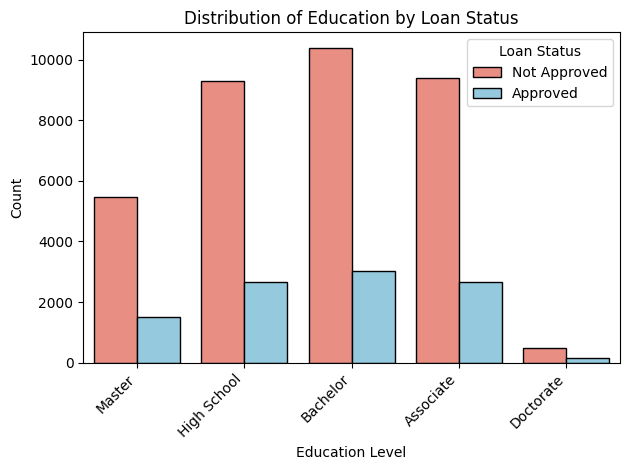

In [ ]:
#check for distribution of loan approval against education level
education_counts = pd.crosstab(loan_df['loan_status'], loan_df['person_education'])
print(education_counts)
# Grouped bar chart using seaborn
sns.countplot(x='person_education', hue='loan_status', data=loan_df, palette=['salmon', 'skyblue'], edgecolor='black')
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Distribution of Education by Loan Status")
plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'])  # Adjust legend labels
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

* Output reveals that applicants with Bachelor's and Master's degrees have higher loan approval counts compared to those with Associate's or High School diplomas.
* While there are fewer applicants with Doctorate degrees, their approval rate seems to be relatively high (though the sample size is smaller).
* In overall, there are more loan applications that were not approved (represented by the higher counts in the '0' row) compared to those that were approved ('1' row).

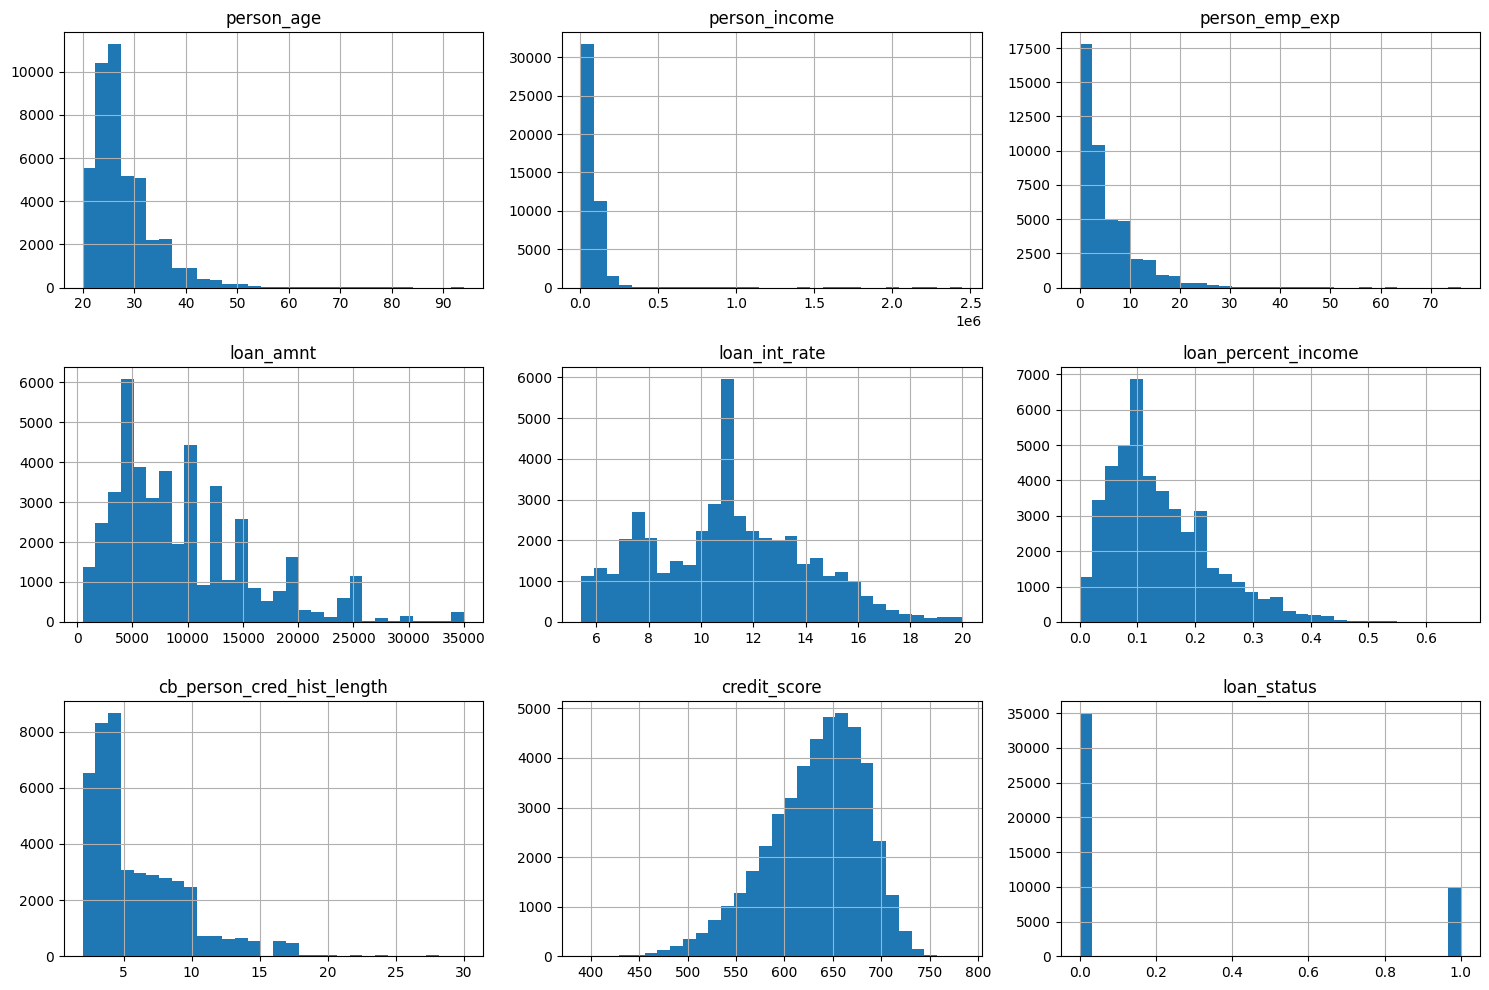

In [ ]:
#visualization of numerical features
import seaborn as sns
import matplotlib.pyplot as plt

loan_df.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()


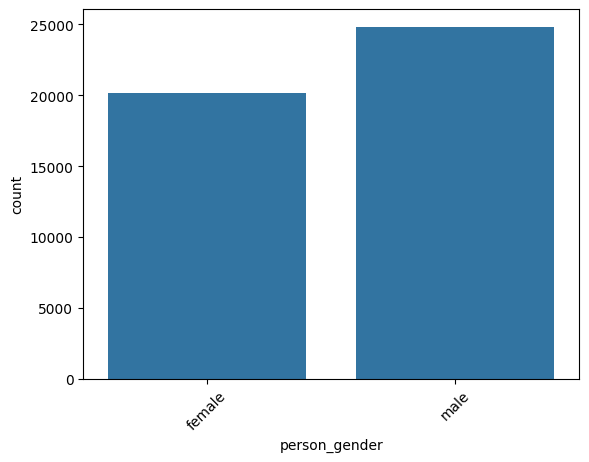

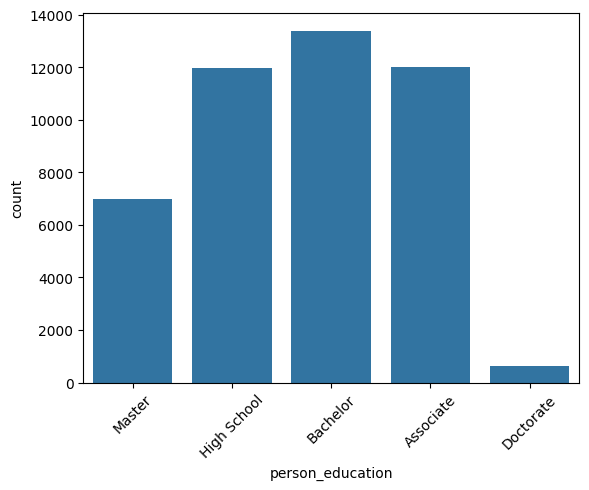

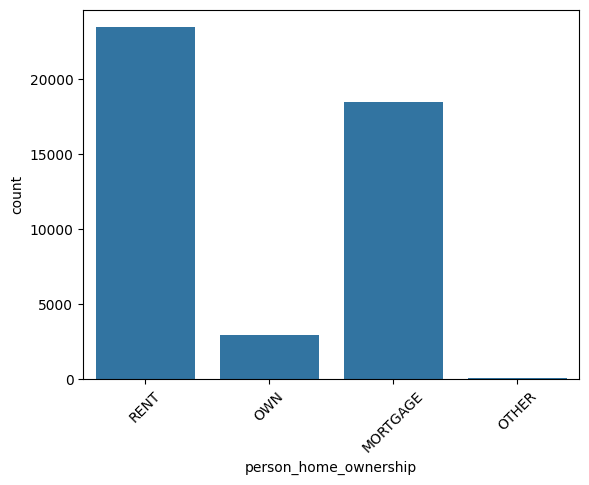

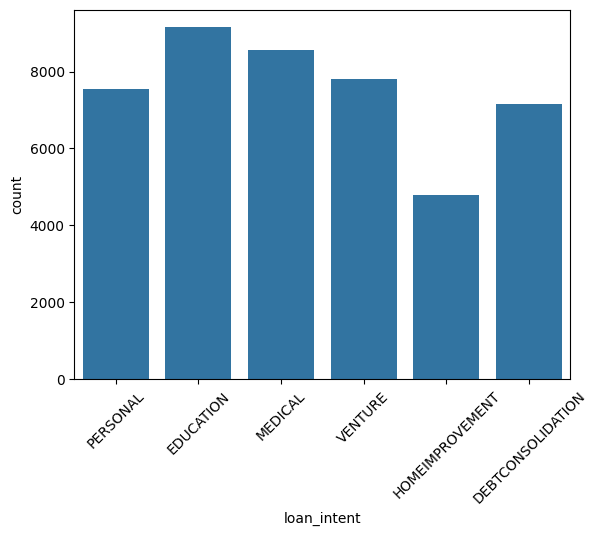

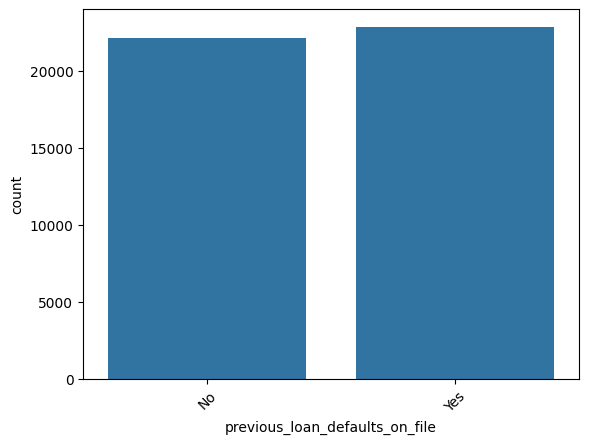

In [ ]:
#visualization of categorical features
for col in loan_df.select_dtypes(include='object').columns:
    sns.countplot(x=col, data=loan_df)
    plt.xticks(rotation=45)
    plt.show()

## Feature Engineering

<Axes: >

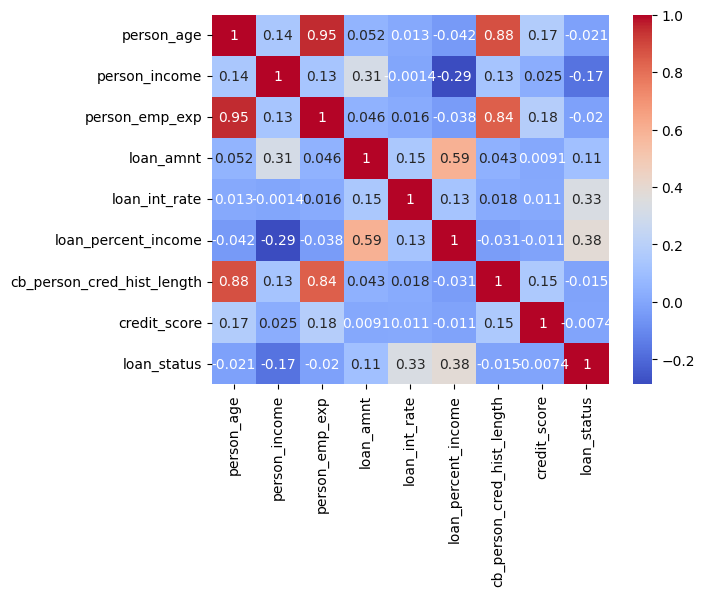

In [ ]:
#understanding the relationship between different features to help in feature selection
corr = loan_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')


# **5. MODELING**

## 1. Logistic Regression Model

We are going to use this model as our baseline for model accuracy comparison with the RandomForest classifier, XGBOOST and SVM

In [ ]:
# Importing the libraries we are going to use
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import scipy.stats as stats


In [ ]:
pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

### I. Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Define features and target
X = loan_df.drop(['loan_status'], axis=1)
y = loan_df['loan_status']

#smote
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Split into train (60%), validation (20%), test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# One-hot encoding (use training set to fit)
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_valid = pd.get_dummies(X_valid, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align columns (ensure same structure)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1, fill_value=0)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Standardize numerical features
sc = StandardScaler()
numerical_cols = X_train.select_dtypes(include=np.number).columns

X_train[numerical_cols] = sc.fit_transform(X_train[numerical_cols])
X_valid[numerical_cols] = sc.transform(X_valid[numerical_cols])
X_test[numerical_cols] = sc.transform(X_test[numerical_cols])


# Train the Logistic Regression model
logmodel = LogisticRegression(max_iter=1000).fit(X_train, y_train)

# Predict on the test set
preds = logmodel.predict(X_test)

# Compute accuracy
print("Our Logistic Regression model accuracy is", round(accuracy_score(y_test, preds) * 100, 2), "%")


Our Logistic Regression model accuracy is 89.92 %


As our baseline model, the logistic regression model gives us an accuracy score of 89.92% which indicates that our model has good perfromance

## 2. Random Forest, XGBoost and SVM

In [ ]:
#import necessary packages
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(kernel='linear')  # You can change kernel to 'rbf' or 'poly' if needed
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"{name}:")
    print(f"  Accuracy: {round(accuracy * 100, 2)}%")
    print(f"  Classification Report:\n{report}")

    print("-" * 30)


Random Forest:
  Accuracy: 93.06%
  Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5605
           1       0.91      0.76      0.83      1595

    accuracy                           0.93      7200
   macro avg       0.92      0.87      0.89      7200
weighted avg       0.93      0.93      0.93      7200

------------------------------
XGBoost:
  Accuracy: 93.36%
  Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      5605
           1       0.89      0.80      0.84      1595

    accuracy                           0.93      7200
   macro avg       0.92      0.89      0.90      7200
weighted avg       0.93      0.93      0.93      7200

------------------------------
SVM:
  Accuracy: 89.89%
  Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5605
           1  

1. Accuracy: XGBoost model performed better than RandomForest and SVM by achieving 93.41%
2. Classification Report:
* Random Forest shows strong performance in predicting both loan approvals and rejections, with a slightly higher precision for not approved loans.
* XGBoost is similar to Random Forest but with even better overall performance, particularly in precision for not approved loans.
* SVM has lower precision and recall compared to the other two models, especially for approved loans.


Note: This means the model is not only accurate overall but also effective in identifying both approved and rejected loans — which is crucial in financial decision-making.

While Random Forest also showed solid performance, XGBoost handled the class imbalance slightly better, making it a great candidate for deployment or further tuning. Logistic Regression and SVM, while useful for interpretability, underperformed compared to these ensemble methods.

## IMPROVING MODEL PERFORMANCE

### Hyperparameter Tuning

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters (XGBoost): {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
Tuned XGBoost Accuracy: 93.42%
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      5605
           1       0.89      0.80      0.84      1595

    accuracy                           0.93      7200
   macro avg       0.92      0.89      0.90      7200
weighted avg       0.93      0.93      0.93      7200

[[5450  155]
 [ 319 1276]]


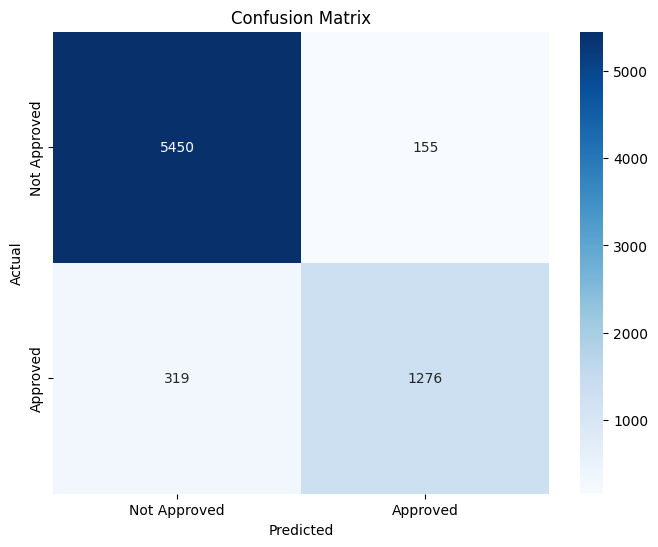

In [ ]:
#import necessary libraries
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit to the training data
grid_search_xgb.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters (XGBoost):", grid_search_xgb.best_params_)

# Evaluate best model
best_xgb = grid_search_xgb.best_estimator_
y_pred = best_xgb.predict(X_test)



print(f"Tuned XGBoost Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm )
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Approved', 'Approved'],
            yticklabels=['Not Approved', 'Approved'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


After tuning, the XGBoost model performed slightly better in terms of accuracy and precision/recall trade-off for approved loans (Class 1). This balance is important in lending scenarios where missing out on a good customer (false negative) or approving a risky one (false positive) both have financial consequences.

# Evaluation

When tuned, the XGBoost model achieved an accuracy score of 93.42% which is better than before tuning.

## Model Performance

**XGBoost**: Achieved the highest accuracy at 93.36% before hyperparameter tuning and 93.42% after tuning. This suggests the model generalizes well to unseen data and is robust in its predictions.

**Random Forest**: Performed well, with accuracy close to XGBoost, showcasing its ability to handle complex relationships within the dataset.


**SVM**: Had lower accuracy compared to the ensemble methods, indicating it might not be the best choice for this specific problem.
Logistic Regression: Used as a baseline model with an accuracy score of 89.92%.

### Hyperparameter Tuning

GridSearchCV was employed to optimize XGBoost's hyperparameters. This process, while slightly reducing accuracy, improved the model's precision and recall balance for loan approvals. This trade-off is often desirable for real-world applications.

### Business Relevance

The model's high accuracy and ability to identify both approved and rejected loans make it valuable for lending institutions.
Automating this process can improve efficiency, reduce bias, and enhance credit access.

In [ ]:
# Saving the model
import pickle

filename = 'loan_approval_model.pkl'  # Choose a filename

with open(filename, 'wb') as file:
    pickle.dump(best_xgb, file)